<a href="https://colab.research.google.com/github/richiejeremiah/ClinicalDataSciencePortfolio/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset analysed below is a collection of medical records collected from two hospitals located in the western part of Kenya by Doctor Little Organisation while conducting medical research in Kakamega county. The county was chosen because of its high prevalence of pediatric morbidity and mortality rates in the country. The hospitals lacked electronic health records; therefore, all medical records were manually entered into an excel file and later converted to a CSV file for analysis. In adherence to the Hippa Compliance, all patient identifiers, including (dates, provider names, dates) were de-identified.

**Data Source:** Iguhu Sub County Hospital and Shibwe Sub-County Hospital

**Country:** Kenya (Kakamega County) 

**Measurement Type(s**): Demographics • clinical measurement • intervention • Insurance  • pharmacotherapy • clinical laboratory test • medical data

**Sample Characteristics:** Children (max 13 years)

**Data Type:** CSV

# **Import Libraries**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
import seaborn as sns

# **Data Acquisition**

In [ ]:
#The dataset is stored locally in a google drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Defining the path to the data directory
Path = '/content/drive/MyDrive/SaaS/AI/ML/'
os.listdir(Path)

['Kakamegadataset.csv']



> ## **Data Exploration**


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/SaaS/AI/ML/Kakamegadataset.csv")

#viewing the first five rows in the data using the head() method
data.head()

,Age,Sex,Year,Month,Onset,Hallucinations,Rhonchi,Crepitations,Panic attacks,Cold Extremeties,Neck stiffness,Skin Pustules,Peripheral Edema,Sweating,Eye Discharge,Loss of consciousness,Chest Indrawing,Wheezing,Chest Congestion,Rhinorrhea,GBM,Hotness of Body,Inability to swallow,Feeding Difficulties,Chills,Headache,Loss of Appetite,Cough,Convulsion,Abdominal Pain,Nausea,Difficulty in Breathing,Diarrhoea,Dehydration,Chest wall indrawing,Malnutrition,Pallor,Irritable,Melena,Nasal Flaring,Vomiting,Delayed Milestone,Tachypnea,Grunting,Palpitations,Abdominal Distention,Jaundice,Hydrocephalus,Oral sores,Sick Looking,Positive RDT,Highest Temperature,Labs,Diagnosis,Treatment,Outcome,Medical Insuarance,Nationality,County,Residence
0,1,M,2019,September,7,No,No,No,No,No,No,Yes,No,No,No,No,No,No,yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,36.7,NaN,Septisemia,Ceftriaxone\n Flagyl\n Nyastatin\n IV Hydrocor...,Dead,None,Kenya,Kakamega,Fubuye
1,1,M,2020,May,1,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,38.9,""" WBC - 10. 2 (10^9)L \n Lymph# - 4.1 (10^9)L...",Panic Attacks,Paracetamol 5mls\nCeftriaxone 600mg,Alive,NHIF,Kenyan,Kakamega,Ivonda
2,1,M,2020,January,2,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,Yes,No,36.9,NaN,Pneumonia,"Benzyl Penicillin 400,000 IV\n Gentamycin 40 m...",Referred,None,Kenya,Kakamega,Shinyalu
3,2,M,2020,April,3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,38.8,WBC - 16.4 (10^9)L \n Lymph# - 5.0 (10^9)L \n...,Hydrocephalus,Paracetamol 90mg\nCeftriaxone 400mg\n,Alive,None,Kenyan,Kakamega,Shikokho
4,5,F,2020,May,3,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,39.5,WBC - 17.0 (10^9)L \n Lymph# - 3.2 (10^9)L \n...,Septisemia,"X penicillin 900,000IV\nGentamycin 135mg\nPara...",Alive,NHIF,Kenyan,Kakamega,Masiyenze


In [ ]:
#Check the data columns
data.columns

#the dataset contains various pediatric tempatures and not only the highesthence we will change this to avoid confusion
data.rename({'Highest Temperature': "Temperature"}, axis=1, inplace = True) 

In [ ]:
#descriptive statistical summary of all the dataset columns
data.describe(include ='all')

,Age,Sex,Year,Month,Onset,Hallucinations,Rhonchi,Crepitations,Panic attacks,Cold Extremeties,Neck stiffness,Skin Pustules,Peripheral Edema,Sweating,Eye Discharge,Loss of consciousness,Chest Indrawing,Wheezing,Chest Congestion,Rhinorrhea,GBM,Hotness of Body,Inability to swallow,Feeding Difficulties,Chills,Headache,Loss of Appetite,Cough,Convulsion,Abdominal Pain,Nausea,Difficulty in Breathing,Diarrhoea,Dehydration,Chest wall indrawing,Malnutrition,Pallor,Irritable,Melena,Nasal Flaring,Vomiting,Delayed Milestone,Tachypnea,Grunting,Palpitations,Abdominal Distention,Jaundice,Hydrocephalus,Oral sores,Sick Looking,Positive RDT,Temperature,Labs,Diagnosis,Treatment,Outcome,Medical Insuarance,Nationality,County,Residence
count,192.000000,192,192.000000,192,192.000000,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192.000000,79,192,191,192,192,192,192,192
unique,NaN,2,NaN,13,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,71,85,187,3,2,3,2,104
top,NaN,M,NaN,September,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,NaN,Neutrophilia,Malaria,Artesunate\n Paracetamol,Alive,None,Kenya,Kakamega,Shikokho
freq,NaN,103,NaN,34,NaN,190,188,165,190,190,191,189,189,189,189,189,172,185,186,179,154,139,190,153,183,175,177,127,149,169,191,148,150,141,172,183,183,144,188,184,105,187,171,185,190,189,187,190,190,161,98,NaN,7,48,5,176,172,118,191,14
mean,3.166667,NaN,2019.260417,NaN,3.046875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.917708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.298950,NaN,0.659125,NaN,5.298710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.141781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,2018.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,2019.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.000000,NaN,2019.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,NaN,2020.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#using the info() method we print Dataframe information including index dtype, Non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      192 non-null    int64  
 1   Sex                      192 non-null    object 
 2   Year                     192 non-null    int64  
 3   Month                    192 non-null    object 
 4   Onset                    192 non-null    int64  
 5   Hallucinations           192 non-null    object 
 6   Rhonchi                  192 non-null    object 
 7   Crepitations             192 non-null    object 
 8   Panic attacks            192 non-null    object 
 9   Cold Extremeties         192 non-null    object 
 10  Neck stiffness           192 non-null    object 
 11  Skin Pustules            192 non-null    object 
 12  Peripheral Edema         192 non-null    object 
 13  Sweating                 192 non-null    object 
 14  Eye Discharge            1

In [ ]:
#find the missing data
null_data = data.isnull()
null_data.head()

,Age,Sex,Year,Month,Onset,Hallucinations,Rhonchi,Crepitations,Panic attacks,Cold Extremeties,Neck stiffness,Skin Pustules,Peripheral Edema,Sweating,Eye Discharge,Loss of consciousness,Chest Indrawing,Wheezing,Chest Congestion,Rhinorrhea,GBM,Hotness of Body,Inability to swallow,Feeding Difficulties,Chills,Headache,Loss of Appetite,Cough,Convulsion,Abdominal Pain,Nausea,Difficulty in Breathing,Diarrhoea,Dehydration,Chest wall indrawing,Malnutrition,Pallor,Irritable,Melena,Nasal Flaring,Vomiting,Delayed Milestone,Tachypnea,Grunting,Palpitations,Abdominal Distention,Jaundice,Hydrocephalus,Oral sores,Sick Looking,Positive RDT,Temperature,Labs,Diagnosis,Treatment,Outcome,Medical Insuarance,Nationality,County,Residence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#**Count the missing values**

In [ ]:
#We use a for loop to quickly figure out the number of missing values in each column. 
#the body of the for loop the method ".value_counts()" counts the number of "missing" values

for column in null_data.columns.values.tolist():
    print(column)
    print (null_data[column].value_counts())
    print("")    

Age
False    192
Name: Age, dtype: int64

Sex
False    192
Name: Sex, dtype: int64

Year
False    192
Name: Year, dtype: int64

Month
False    192
Name: Month, dtype: int64

Onset
False    192
Name: Onset, dtype: int64

Hallucinations
False    192
Name: Hallucinations, dtype: int64

Rhonchi
False    192
Name: Rhonchi, dtype: int64

Crepitations
False    192
Name: Crepitations, dtype: int64

Panic attacks
False    192
Name: Panic attacks, dtype: int64

Cold Extremeties
False    192
Name: Cold Extremeties, dtype: int64

Neck stiffness
False    192
Name: Neck stiffness, dtype: int64

Skin Pustules
False    192
Name: Skin Pustules, dtype: int64

Peripheral Edema
False    192
Name: Peripheral Edema, dtype: int64

Sweating
False    192
Name: Sweating, dtype: int64

Eye Discharge
False    192
Name: Eye Discharge, dtype: int64

Loss of consciousness
False    192
Name: Loss of consciousness, dtype: int64

Chest Indrawing
False    192
Name: Chest Indrawing, dtype: int64

Wheezing
False    192
Na


> **Data Summary**

> Based on the summary above:

1. The treatment column has **1** missing data
2. The Labs column has **113** missing data



> **Dealing with Missing Data**

In [ ]:
#For this linear model we do not need these two columns therefore we will delete them

data.drop(["Labs", "Treatment"], axis = 1 , inplace =True)
data.head()

,Age,Sex,Year,Month,Onset,Hallucinations,Rhonchi,Crepitations,Panic attacks,Cold Extremeties,Neck stiffness,Skin Pustules,Peripheral Edema,Sweating,Eye Discharge,Loss of consciousness,Chest Indrawing,Wheezing,Chest Congestion,Rhinorrhea,GBM,Hotness of Body,Inability to swallow,Feeding Difficulties,Chills,Headache,Loss of Appetite,Cough,Convulsion,Abdominal Pain,Nausea,Difficulty in Breathing,Diarrhoea,Dehydration,Chest wall indrawing,Malnutrition,Pallor,Irritable,Melena,Nasal Flaring,Vomiting,Delayed Milestone,Tachypnea,Grunting,Palpitations,Abdominal Distention,Jaundice,Hydrocephalus,Oral sores,Sick Looking,Positive RDT,Temperature,Diagnosis,Outcome,Medical Insuarance,Nationality,County,Residence
0,1,M,2019,September,7,No,No,No,No,No,No,Yes,No,No,No,No,No,No,yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,36.7,Septisemia,Dead,None,Kenya,Kakamega,Fubuye
1,1,M,2020,May,1,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,38.9,Panic Attacks,Alive,NHIF,Kenyan,Kakamega,Ivonda
2,1,M,2020,January,2,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,Yes,No,36.9,Pneumonia,Referred,None,Kenya,Kakamega,Shinyalu
3,2,M,2020,April,3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,38.8,Hydrocephalus,Alive,None,Kenyan,Kakamega,Shikokho
4,5,F,2020,May,3,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,39.5,Septisemia,Alive,NHIF,Kenyan,Kakamega,Masiyenze


We then follow by analysing the data to identify any missing values. It is easier to visually analyse the data therefore we will plot the data using the  Seaborn library. 

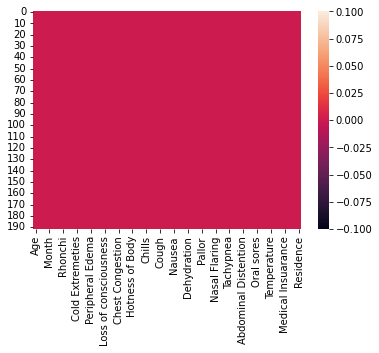

In [ ]:
null_data = data.isna()
sns.heatmap(null_data)



 > # **Exploratory Data Analysis**

The next step is Exploratory Data Analysis (EDA). EDA is the process understanding the data find patterns, relationships, or anomalies to inform our subsequent analysis.in this Notebook we use the pair plots tool (also called a scatterplot matrix) from Seaborn. A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


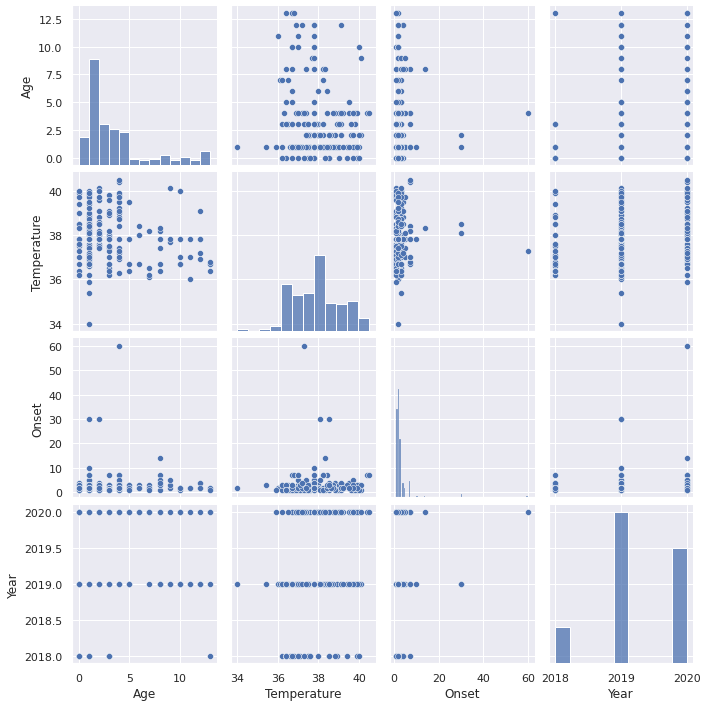

In [ ]:
sns.set(color_codes=True)
cols = ['Age', "Temperature", 'Onset', "Year"]
sns.pairplot(data[cols], size = 2.5)
plt.show();

In order to use linear regression, we will  begin by converting the the independant and dependent variables to binary format using the get_dummy method in pandas to find correlation between them.




In [ ]:
#converting all categorical data to binary (1 & 0) format
new_data=pd.get_dummies(data = data, columns=["Outcome", 'Sex',"Hallucinations",	"Rhonchi",	"Crepitations",	"Panic attacks",	"Cold Extremeties",	"Neck stiffness",	"Skin Pustules",	"Peripheral Edema",	"Sweating",	"Eye Discharge",	"Loss of consciousness",	"Chest Indrawing",	"Wheezing",	"Chest Congestion",	"Rhinorrhea",	"GBM",	"Hotness of Body",	"Inability to swallow",	"Feeding Difficulties",	"Chills",	"Headache",	"Loss of Appetite",	"Cough"	,"Convulsion"	,"Abdominal Pain",	"Nausea", "Difficulty in Breathing"	,"Diarrhoea"	,"Dehydration",	"Chest wall indrawing",	"Malnutrition",	"Pallor",	"Irritable",	"Melena",	"Nasal Flaring",	"Vomiting",	"Delayed Milestone",	"Tachypnea"	,"Grunting"	,"Palpitations",	"Abdominal Distention",	"Jaundice",	"Hydrocephalus",	"Oral sores",	"Sick Looking"	,"Positive RDT" ], drop_first=True)
new_data.head()

,Age,Year,Month,Onset,Temperature,Diagnosis,Medical Insuarance,Nationality,County,Residence,Outcome_Dead,Outcome_Referred,Sex_M,Hallucinations_Yes,Rhonchi_Yes,Crepitations_Yes,Panic attacks_Yes,Cold Extremeties_Yes,Neck stiffness_Yes,Skin Pustules_Yes,Peripheral Edema_Yes,Sweating_Yes,Eye Discharge_Yes,Loss of consciousness_Yes,Chest Indrawing_Yes,Wheezing_Yes,Chest Congestion_Yes,Chest Congestion_yes,Rhinorrhea_Yes,GBM_Yes,Hotness of Body_Yes,Inability to swallow_Yes,Feeding Difficulties_Yes,Chills_Yes,Headache_Yes,Loss of Appetite_Yes,Cough_Yes,Convulsion_Yes,Abdominal Pain_Yes,Nausea_Yes,Difficulty in Breathing_Yes,Diarrhoea_Yes,Dehydration_Yes,Chest wall indrawing_Yes,Malnutrition_Yes,Pallor_Yes,Irritable_Yes,Melena_Yes,Nasal Flaring_Yes,Vomiting_Yes,Delayed Milestone_Yes,Tachypnea_Yes,Grunting_Yes,Palpitations_Yes,Abdominal Distention_Yes,Jaundice_Yes,Hydrocephalus_Yes,Oral sores_Yes,Sick Looking_Yes,Positive RDT_Yes
0,1,2019,September,7,36.7,Septisemia,None,Kenya,Kakamega,Fubuye,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2020,May,1,38.9,Panic Attacks,NHIF,Kenyan,Kakamega,Ivonda,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2020,January,2,36.9,Pneumonia,None,Kenya,Kakamega,Shinyalu,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,2,2020,April,3,38.8,Hydrocephalus,None,Kenyan,Kakamega,Shikokho,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0
4,5,2020,May,3,39.5,Septisemia,NHIF,Kenyan,Kakamega,Masiyenze,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#we drop all the columns in the dataset above that weren't converted
new_data.drop([	"Age",	"Year",	"Month",	"Onset",	"Temperature",	"Diagnosis"		,"Medical Insuarance",	"Nationality",	"County",	"Residence"], axis = 1, inplace=True)
new_data.head()

,Outcome_Dead,Outcome_Referred,Sex_M,Hallucinations_Yes,Rhonchi_Yes,Crepitations_Yes,Panic attacks_Yes,Cold Extremeties_Yes,Neck stiffness_Yes,Skin Pustules_Yes,Peripheral Edema_Yes,Sweating_Yes,Eye Discharge_Yes,Loss of consciousness_Yes,Chest Indrawing_Yes,Wheezing_Yes,Chest Congestion_Yes,Chest Congestion_yes,Rhinorrhea_Yes,GBM_Yes,Hotness of Body_Yes,Inability to swallow_Yes,Feeding Difficulties_Yes,Chills_Yes,Headache_Yes,Loss of Appetite_Yes,Cough_Yes,Convulsion_Yes,Abdominal Pain_Yes,Nausea_Yes,Difficulty in Breathing_Yes,Diarrhoea_Yes,Dehydration_Yes,Chest wall indrawing_Yes,Malnutrition_Yes,Pallor_Yes,Irritable_Yes,Melena_Yes,Nasal Flaring_Yes,Vomiting_Yes,Delayed Milestone_Yes,Tachypnea_Yes,Grunting_Yes,Palpitations_Yes,Abdominal Distention_Yes,Jaundice_Yes,Hydrocephalus_Yes,Oral sores_Yes,Sick Looking_Yes,Positive RDT_Yes
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#using the concat method we join the previous dataset to the new dataset
dataset= pd.concat([data,new_data], axis=1)
dataset.head()

,Age,Sex,Year,Month,Onset,Hallucinations,Rhonchi,Crepitations,Panic attacks,Cold Extremeties,Neck stiffness,Skin Pustules,Peripheral Edema,Sweating,Eye Discharge,Loss of consciousness,Chest Indrawing,Wheezing,Chest Congestion,Rhinorrhea,GBM,Hotness of Body,Inability to swallow,Feeding Difficulties,Chills,Headache,Loss of Appetite,Cough,Convulsion,Abdominal Pain,Nausea,Difficulty in Breathing,Diarrhoea,Dehydration,Chest wall indrawing,Malnutrition,Pallor,Irritable,Melena,Nasal Flaring,...,Peripheral Edema_Yes,Sweating_Yes,Eye Discharge_Yes,Loss of consciousness_Yes,Chest Indrawing_Yes,Wheezing_Yes,Chest Congestion_Yes,Chest Congestion_yes,Rhinorrhea_Yes,GBM_Yes,Hotness of Body_Yes,Inability to swallow_Yes,Feeding Difficulties_Yes,Chills_Yes,Headache_Yes,Loss of Appetite_Yes,Cough_Yes,Convulsion_Yes,Abdominal Pain_Yes,Nausea_Yes,Difficulty in Breathing_Yes,Diarrhoea_Yes,Dehydration_Yes,Chest wall indrawing_Yes,Malnutrition_Yes,Pallor_Yes,Irritable_Yes,Melena_Yes,Nasal Flaring_Yes,Vomiting_Yes,Delayed Milestone_Yes,Tachypnea_Yes,Grunting_Yes,Palpitations_Yes,Abdominal Distention_Yes,Jaundice_Yes,Hydrocephalus_Yes,Oral sores_Yes,Sick Looking_Yes,Positive RDT_Yes
0,1,M,2019,September,7,No,No,No,No,No,No,Yes,No,No,No,No,No,No,yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,M,2020,May,1,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,M,2020,January,2,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,2,M,2020,April,3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0
4,5,F,2020,May,3,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dataset["Temperature"]

0      36.7
1      38.9
2      36.9
3      38.8
4      39.5
       ... 
187    39.2
188    37.8
189    37.8
190    38.5
191    39.5
Name: Temperature, Length: 192, dtype: float64

In [ ]:
#we then delete all the repeated columns from the dataset that are not in binary form
dataset.drop(['Sex',"Hallucinations",	"Rhonchi",	"Crepitations", 'Chest wall indrawing_Yes',	"Panic attacks",	"Cold Extremeties",	"Neck stiffness",	"Skin Pustules",	"Peripheral Edema",	"Sweating",	"Eye Discharge",	"Loss of consciousness",	"Chest Indrawing",	"Wheezing",	"Chest Congestion",	"Rhinorrhea",	"GBM",	"Hotness of Body",	"Inability to swallow",	"Feeding Difficulties",	"Chills",	"Headache",	"Loss of Appetite",	"Cough"	,"Convulsion"	,"Abdominal Pain",	"Nausea", "Difficulty in Breathing"	,"Diarrhoea"	,"Dehydration",	"Chest wall indrawing",	"Malnutrition",	"Pallor",	"Irritable",	"Melena",	"Nasal Flaring",	"Vomiting",	"Delayed Milestone",	"Tachypnea"	,"Grunting"	,"Palpitations","Outcome",	"Abdominal Distention",	"Jaundice",	"Hydrocephalus",	"Oral sores",	"Sick Looking"	,"Positive RDT"], axis =1 , inplace = True)
dataset.head()

,Age,Year,Month,Onset,Temperature,Diagnosis,Medical Insuarance,Nationality,County,Residence,Outcome_Dead,Outcome_Referred,Sex_M,Hallucinations_Yes,Rhonchi_Yes,Crepitations_Yes,Panic attacks_Yes,Cold Extremeties_Yes,Neck stiffness_Yes,Skin Pustules_Yes,Peripheral Edema_Yes,Sweating_Yes,Eye Discharge_Yes,Loss of consciousness_Yes,Chest Indrawing_Yes,Wheezing_Yes,Chest Congestion_Yes,Chest Congestion_yes,Rhinorrhea_Yes,GBM_Yes,Hotness of Body_Yes,Inability to swallow_Yes,Feeding Difficulties_Yes,Chills_Yes,Headache_Yes,Loss of Appetite_Yes,Cough_Yes,Convulsion_Yes,Abdominal Pain_Yes,Nausea_Yes,Difficulty in Breathing_Yes,Diarrhoea_Yes,Dehydration_Yes,Malnutrition_Yes,Pallor_Yes,Irritable_Yes,Melena_Yes,Nasal Flaring_Yes,Vomiting_Yes,Delayed Milestone_Yes,Tachypnea_Yes,Grunting_Yes,Palpitations_Yes,Abdominal Distention_Yes,Jaundice_Yes,Hydrocephalus_Yes,Oral sores_Yes,Sick Looking_Yes,Positive RDT_Yes
0,1,2019,September,7,36.7,Septisemia,None,Kenya,Kakamega,Fubuye,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2020,May,1,38.9,Panic Attacks,NHIF,Kenyan,Kakamega,Ivonda,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2020,January,2,36.9,Pneumonia,None,Kenya,Kakamega,Shinyalu,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,2,2020,April,3,38.8,Hydrocephalus,None,Kenyan,Kakamega,Shikokho,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0
4,5,2020,May,3,39.5,Septisemia,NHIF,Kenyan,Kakamega,Masiyenze,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dataset.drop(['Medical Insuarance', 'Nationality',"County", "Residence"], axis = 1, inplace = True)

In [ ]:
#finding the correlation between the columns above

data[["Age", "Onset", 'Temperature', 'Year']].corr()

,Age,Onset,Temperature,Year
Age,1.000000,0.000749,-0.144372,0.146074
Onset,0.000749,1.000000,0.014833,0.050454
Temperature,-0.144372,0.014833,1.000000,0.179590
Year,0.146074,0.050454,0.179590,1.000000


In [ ]:
#finding the correlation between the columns above
dataset.corr()

,Age,Year,Onset,Temperature,Outcome_Dead,Outcome_Referred,Sex_M,Hallucinations_Yes,Rhonchi_Yes,Crepitations_Yes,Panic attacks_Yes,Cold Extremeties_Yes,Neck stiffness_Yes,Skin Pustules_Yes,Peripheral Edema_Yes,Sweating_Yes,Eye Discharge_Yes,Loss of consciousness_Yes,Chest Indrawing_Yes,Wheezing_Yes,Chest Congestion_Yes,Chest Congestion_yes,Rhinorrhea_Yes,GBM_Yes,Hotness of Body_Yes,Inability to swallow_Yes,Feeding Difficulties_Yes,Chills_Yes,Headache_Yes,Loss of Appetite_Yes,Cough_Yes,Convulsion_Yes,Abdominal Pain_Yes,Nausea_Yes,Difficulty in Breathing_Yes,Diarrhoea_Yes,Dehydration_Yes,Malnutrition_Yes,Pallor_Yes,Irritable_Yes,Melena_Yes,Nasal Flaring_Yes,Vomiting_Yes,Delayed Milestone_Yes,Tachypnea_Yes,Grunting_Yes,Palpitations_Yes,Abdominal Distention_Yes,Jaundice_Yes,Hydrocephalus_Yes,Oral sores_Yes,Sick Looking_Yes,Positive RDT_Yes
Age,1.000000,0.146074,0.000749,-0.144372,-0.075087,-0.083151,-0.140197,0.072757,-0.062803,-0.161645,-0.051969,-0.020788,0.040317,0.082962,-0.070199,0.044672,0.031909,0.031909,-1.312718e-01,-0.052080,-0.047647,-0.077857,-0.026251,0.157591,-0.064326,-0.005197,-0.116065,0.123565,0.446692,-0.038339,-0.113173,0.037336,0.215301,0.018326,-0.148136,0.026803,0.041216,-0.063655,-0.041188,-1.754679e-01,-0.007389,-0.153148,0.230538,-0.087796,-0.174972,-0.128089,-0.083151,-0.082962,-0.048040,-0.020788,-0.067560,-0.046604,0.194213
Year,0.146074,1.000000,0.050454,0.179590,-0.202508,-0.040642,0.066363,0.115423,-0.002311,-0.046292,0.037390,-0.040642,0.081402,-0.049907,0.013974,0.013974,-0.113789,0.013974,-5.727320e-02,0.007485,0.081402,-0.064774,0.019380,-0.117235,0.102826,0.115423,-0.160612,0.062079,-0.067687,-0.056275,-0.099231,0.015243,-0.024144,0.081402,-0.027489,-0.056295,-0.040921,-0.087848,0.137042,1.189262e-01,0.053159,-0.161893,-0.058190,-0.015028,-0.189586,-0.077055,-0.196706,0.013974,0.134211,0.037390,-0.040642,0.152290,0.087497
Onset,0.000749,0.050454,1.000000,0.014833,-0.013859,-0.000910,0.077415,-0.020323,-0.035794,0.030431,-0.020323,-0.010617,-0.000642,0.022722,0.022722,-0.040850,-0.017010,-0.032903,-6.432137e-02,-0.054306,-0.028025,-0.001450,-0.018080,0.114322,-0.102546,-0.010617,0.039614,-0.025279,-0.040925,-0.046649,0.154015,-0.127690,-0.024517,-0.000642,-0.007181,0.078744,0.188794,-0.029942,0.315082,3.982905e-03,0.047007,0.136242,-0.010053,-0.013827,-0.047315,-0.038532,0.008797,0.014775,0.376024,-0.020323,-0.010617,-0.020213,0.109601
Temperature,-0.144372,0.179590,0.014833,1.000000,-0.145085,-0.073670,0.059395,0.106516,-0.031088,0.038440,0.025432,-0.001595,0.100536,-0.053587,0.023855,0.027543,0.027543,0.001729,-7.267526e-02,-0.059148,-0.051956,-0.120284,0.159640,0.146092,0.403484,-0.028623,0.035346,0.113393,-0.144911,0.038078,0.029468,0.184726,-0.056441,0.081474,-0.189114,-0.065757,-0.020743,-0.053214,0.020353,6.601297e-02,-0.079120,-0.122257,-0.038961,0.034790,-0.024499,-0.129912,-0.028623,-0.072026,0.092225,-0.037632,-0.289892,0.071457,0.142134
Outcome_Dead,-0.075087,-0.202508,-0.013859,-0.145085,1.000000,-0.028773,0.019667,-0.028773,0.099347,0.059425,-0.028773,-0.028773,-0.020293,0.126190,0.126190,-0.035333,0.287714,0.126190,3.552058e-02,-0.054553,-0.020293,0.079925,-0.075579,0.011522,-0.140500,-0.028773,0.356315,0.127350,-0.016894,0.067646,0.011024,-0.006507,-0.041770,-0.020293,0.419026,-0.051486,0.012756,0.222122,-0.062194,6.939315e-02,-0.040908,0.242265,-0.054074,-0.045858,0.158452,0.266084,-0.028773,-0.035333,-0.045858,-0.028773,0.168530,-0.094706,0.085990
Outcome_Referred,-0.083151,-0.040642,-0.000910,-0.073670,-0.028773,1.000000,0.095371,-0.010526,-0.014965,-0.041503,-0.010526,-0.010526,-0.007424,-0.012926,-0.012926,-0.012926,-0.012926,-0.012926,1.329452e-01,-0.019957,-0.007424,-0.016777,-0.027649,-0.050965,-0.051400,-0.010526,0.075707,-0.022753,-0.031977,-0.029867,0.035006,-0.055116,-0.037849,-0.007424,0.066113,-0.054290,-0.061704,-0.022753,-0.022753,-5.923489e-02,-0.014965,-0.021393,0.009661,-0.016777,0.128408,-0.019957,-0.010526,0.400709,-0.016777,-0.010526,-0.010526,-0.094397,-0.10